In [58]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [52]:
df_habr = pd.read_csv('1_1.csv',encoding='windows-1251')
df_habr.head()

,text,question,answer
0,SQL Server распараллеливает соединение вложенн...,что обеспечивает поток для каждой внешней таблицы,соединение своей внутренней таблицы
1,Привет Хабр! Меня зовут Дмитрий Комиссаров я...,к чему способна привести ошибка в выборе корпо...,остановке бизнес-процессов всего предприятия
2,Статья Social media usage in the United States...,сколько времени ежедневного использования до ...,менее часа
3,За последнюю неделю прошло очень много негатив...,что закрыли во многих европейских стран,воздушное пространство
4,Сейчас корпорации научились доставлять изменен...,за сколько корпорации научились доставлять изм...,за 2-3 дня


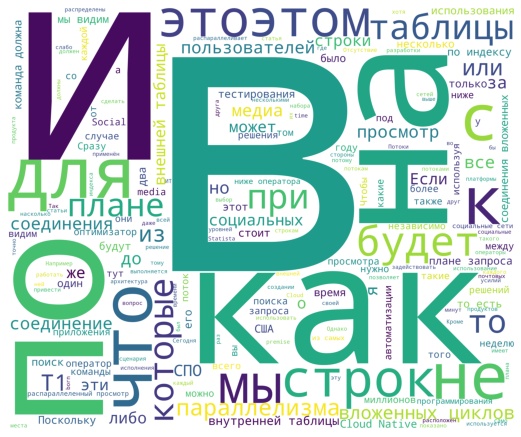

In [53]:
# Текстовая строка из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus
# Список всех слов
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus
# Облако слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

corpus = get_corpus(df_habr['text'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)
print(procWordCloud)

In [54]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from string import punctuation
russian_stopwords = stopwords.words("russian")

# Удаление знаков пунктуации из текста
def remove_punct(text):
    table = {33: ' ', 34: ' ', 35: ' ', 36: ' ', 37: ' ', 38: ' ', 39: ' ', 40: ' ', 41: ' ', 42: ' ', 43: ' ', 44: ' ', 45: ' ', 46: ' ', 47: ' ', 58: ' ', 59: ' ', 60: ' ', 61: ' ', 62: ' ', 63: ' ', 64: ' ', 91: ' ', 92: ' ', 93: ' ', 94: ' ', 95: ' ', 96: ' ', 123: ' ', 124: ' ', 125: ' ', 126: ' '}
    return text.translate(table)

df_habr['Post_clean'] = df_habr['text'].map(lambda x: x.lower())
df_habr['Post_clean'] = df_habr['Post_clean'].map(lambda x: remove_punct(x))
df_habr['Post_clean'] = df_habr['Post_clean'].map(lambda x: x.split(' '))
df_habr['Post_clean'] = df_habr['Post_clean'].map(lambda x: [token for token in x if token not in russian_stopwords\
                                                                  and token != " " \
                                                                  and token.strip() not in punctuation])
df_habr['Post_clean'] = df_habr['Post_clean'].map(lambda x: ' '.join(x))

df_habr.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\givav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,question,answer,Post_clean
0,SQL Server распараллеливает соединение вложенн...,что обеспечивает поток для каждой внешней таблицы,соединение своей внутренней таблицы,sql server распараллеливает соединение вложенн...
1,Привет Хабр! Меня зовут Дмитрий Комиссаров я...,к чему способна привести ошибка в выборе корпо...,остановке бизнес-процессов всего предприятия,привет хабр зовут дмитрий комиссаров член сове...
2,Статья Social media usage in the United States...,сколько времени ежедневного использования до ...,менее часа,статья social media usage in the united states...
3,За последнюю неделю прошло очень много негатив...,что закрыли во многих европейских стран,воздушное пространство,последнюю неделю прошло очень негативных событ...
4,Сейчас корпорации научились доставлять изменен...,за сколько корпорации научились доставлять изм...,за 2-3 дня,корпорации научились доставлять изменения 2–3 ...


<AxesSubplot:>

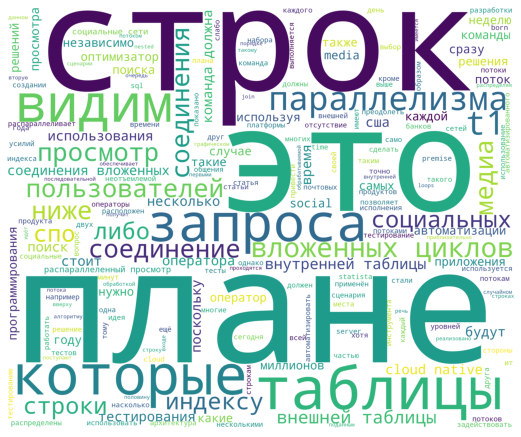

In [55]:
corpus = get_corpus(df_habr['Post_clean'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [69]:
tfidf = TfidfVectorizer()
text_tfidf = tfidf.fit_transform(df_habr['Post_clean']).toarray()

df_text_tfidf = pd.DataFrame(text_tfidf, columns = tfidf.get_feature_names_out())

df_text_tfidf

,100,19,20,2019,2020,2021,2022,2025,23,295,...,экземпляры,эта,это,юридические,является,язык,языка,языке,языков,ясность
0,0.098205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.024551,0.00000,0.049327,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.033062,0.049368,0.00000,0.00000,0.00000,0.049368,0.00000,0.000000
2,0.000000,0.055648,0.000000,0.055648,0.166943,0.055648,0.055648,0.055648,0.055648,0.055648,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000
3,0.000000,0.000000,0.101609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.101609
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.05877,0.196796,0.000000,0.05877,0.05877,0.05877,0.000000,0.05877,0.000000


In [70]:
question_tfidf = tfidf.fit_transform(df_habr['question']).toarray()


df_question_tfidf = pd.DataFrame(question_tfidf, columns = tfidf.get_feature_names_out())
df_question_tfidf

,2019,веб,внешней,во,времени,выборе,года,для,до,доставлять,...,почты,привести,сайтов,сколько,состовляло,способна,стран,таблицы,чему,что
0,0.000000,0.000000,0.387757,0.000000,0.000000,0.000000,0.000000,0.387757,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.387757,0.000000,0.312840
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.377964,0.000000,0.000000,0.000000,0.000000,...,0.377964,0.377964,0.000000,0.000000,0.000000,0.377964,0.000000,0.000000,0.377964,0.000000
2,0.306413,0.306413,0.000000,0.000000,0.306413,0.000000,0.306413,0.000000,0.306413,0.000000,...,0.000000,0.000000,0.306413,0.247212,0.306413,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.420669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420669,0.000000,0.000000,0.339393
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420669,...,0.000000,0.000000,0.000000,0.339393,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [71]:
answer_tfidf = tfidf.fit_transform(df_habr['answer']).toarray()
df_answer_tfidf = pd.DataFrame(answer_tfidf, columns = tfidf.get_feature_names_out())
df_answer_tfidf

,бизнес,внутренней,воздушное,всего,дня,за,менее,остановке,предприятия,пространство,процессов,своей,соединение,таблицы,часа
0,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.5,0.5,0.000000
1,0.447214,0.0,0.000000,0.447214,0.000000,0.000000,0.000000,0.447214,0.447214,0.000000,0.447214,0.0,0.0,0.0,0.000000
2,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.707107
3,0.000000,0.0,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.0,0.0,0.0,0.000000
4,0.000000,0.0,0.000000,0.000000,0.707107,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [72]:
from sklearn.pipeline import Pipeline
# pipeline объединяет в один блок трансформер и модель
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
# линейный классификатор и классификатор методом ближайших соседей
from sklearn import metrics
# для оценки качества модели
from sklearn.model_selection import GridSearchCV
# модуль поиска по сетке параметров

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(df_text_tfidf, df_answer_tfidf, test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [80]:
knb_clf= KNeighborsClassifier(n_neighbors=10)
knb_clf.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous-multioutput'